In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_dir = '../../results/data/experiment2_postbug'
df = None
# Load data
for file in os.listdir(data_dir):
    if not file.endswith('.csv'):
        continue
    if df is None:
        df = pd.read_csv(f'{data_dir}/{file}')
    else:
        df = pd.concat([df, pd.read_csv(f'{data_dir}/{file}')])

filtered_df = df[(df['region'] == 'Avg') & (df['score_type'] == 'f1')]
# df = pd.read_csv(f'{data_dir}/709551_set1_entropy_bb-True_default.csv')

data_dir_baseline = '../../results/data/experiment2_postbug/baseline'
df_baseline = None
for file in os.listdir(data_dir_baseline):
    if not file.endswith('.csv'):
        continue
    if df_baseline is None:
        df_baseline = pd.read_csv(f'{data_dir_baseline}/{file}')
    else:
        df_baseline = pd.concat([df_baseline, pd.read_csv(f'{data_dir_baseline}/{file}')])

In [4]:
df_baseline['uncertainty_measure'] = 'baseline'
df = pd.concat([df, df_baseline])

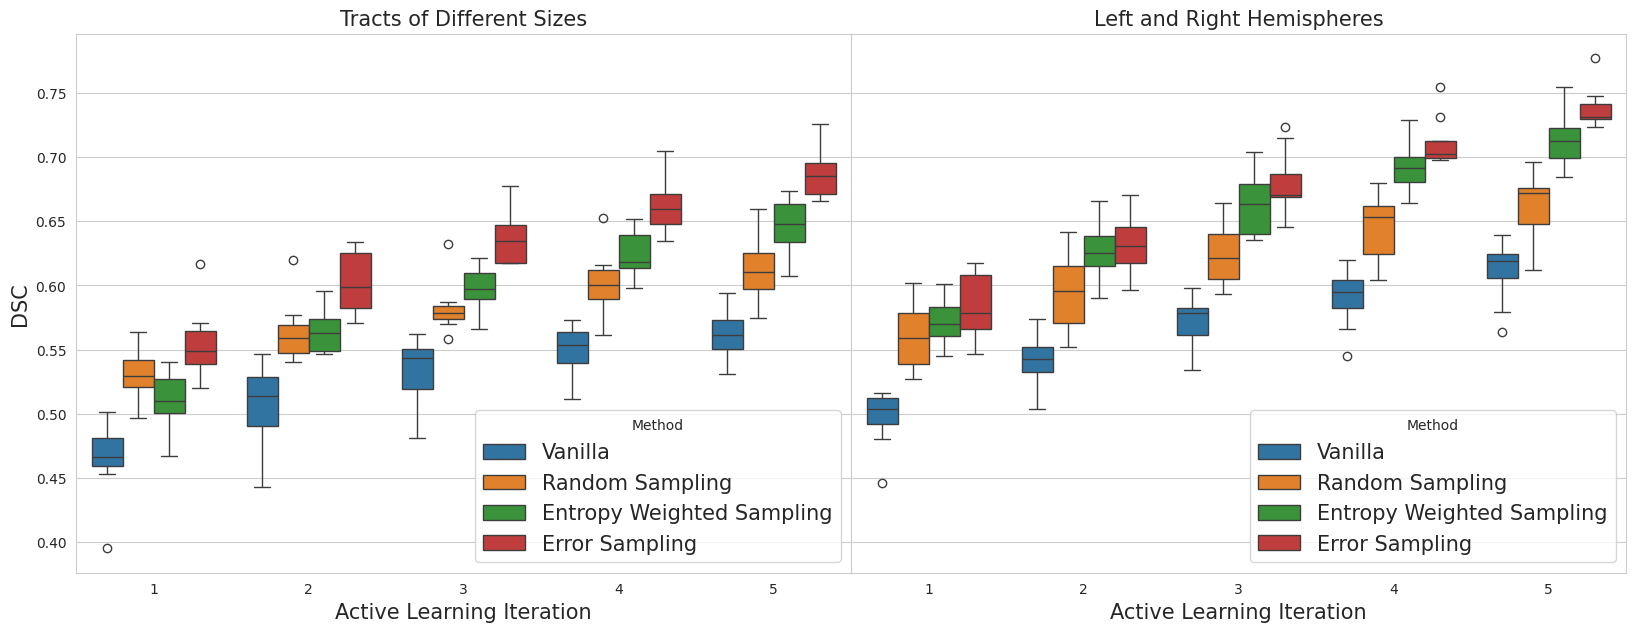

In [5]:
sns.set_style("whitegrid")

filtered_df = df[
    (df['region'] == 'Avg') &
    (df['score_type'] == 'f1') & 
    (df['iteration'] > 0)
    # (df['region'] != 'Other')
]


# Get unique labelsets
labelsets = ['set1', 'set2']
hue_order = ['baseline', 'random', 'entropy', 'ground-truth']

method_name_mapping = {
    'random': 'Random Sampling',
    'entropy': 'Entropy Weighted Sampling',
    'ground-truth': 'Error Sampling',
    'baseline': 'Vanilla'
}

labelset_name_mapping = {
    'set1': 'Tracts of Different Sizes',
    'set2': 'Left and Right Hemispheres',
}

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(20, 7), sharey=True)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.boxplot(
        data=subset,
        x='iteration',
        y='score',
        hue='uncertainty_measure',
        ax=ax,
        hue_order=hue_order,
        # errorbar='ci'
    )
    ax.set_title(f'{labelset_name_mapping[labelset]}', fontsize=15)
    ax.set_xlabel('Active Learning Iteration', fontsize=15)
    ax.set_ylabel('DSC', fontsize=15)

    handles, labels = ax.get_legend_handles_labels()
    labels = [method_name_mapping[label]  for label in labels]

    ax.legend(handles, labels, title='Method', loc='lower right', fontsize=15)
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(f'{data_dir}/experiment-AL_15-font.jpg', bbox_inches='tight', dpi=300)

In [5]:
# score_type = 'f1'
# filtered_df = df[
#     # (df['iteration'] == 5) & 
#     # (df['region'] == tract) & 
#     (df['score_type'] == score_type) & 
#     (df['iteration'] < 6) &
#     (df['labelset'] == 'set1') &
#     (df['feature'].str.contains('tta'))
# ]

# tracts = filtered_df['region'].unique()
# hue_order = ['ground-truth', 'entropy', 'random']

# fig, axes = plt.subplots(nrows=1, ncols=len(tracts), figsize=(7 * len(tracts), 7), sharey=True)

# for i, tract in enumerate(tracts):

#     sns.boxplot(
#         data=filtered_df[
#             (filtered_df['region'] == tract)
#         ],
#         x='iteration',
#         y='score',
#         hue='uncertainty_measure',
#         ax=axes[i],
#         hue_order=hue_order,
#         # errorbar='ci'
#     )
#     axes[i].set_title(f'{tract} - {score_type}')
#     axes[i].set_xlabel('Iteration')
#     axes[i].set_ylabel('DSC')
#     axes[i].legend(title='measure') #, loc='auto')
    
# plt.tight_layout(rect=[0.05, 0.05, 1, 1])
# fig.savefig(f'{data_dir}/post_bug_set1.png')

In [6]:
# score_type = 'f1'
# filtered_df = df[
#     # (df['iteration'] == 5) & 
#     # (df['region'] == tract) & 
#     (df['score_type'] == score_type) & 
#     (df['iteration'] < 6) &
#     (df['labelset'] == 'set2') &
#     (df['feature'].str.contains('tta'))
# ]

# hue_order = ['ground-truth', 'entropy', 'random']

# tracts = filtered_df['region'].unique()

# fig, axes = plt.subplots(nrows=1, ncols=len(tracts), figsize=(7 * len(tracts), 7), sharey=True)

# for i, tract in enumerate(tracts):

#     sns.boxplot(
#         data=filtered_df[
#             (filtered_df['region'] == tract)
#         ],
#         x='iteration',
#         y='score',
#         hue='uncertainty_measure',
#         ax=axes[i],
#         hue_order=hue_order,
#         # errorbar='ci'
#     )
#     axes[i].set_title(f'{tract} - {score_type}')
#     axes[i].set_xlabel('Iteration')
#     axes[i].set_ylabel('DSC')
#     axes[i].legend(title='measure') #, loc='auto')

# plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# fig.savefig(f'{data_dir}/post_bug_set2.png')

In [7]:
# df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

# tract = 'Avg'
# score_type = 'f1'
# tracts = df['region'].unique()


# filtered_df = df[
#     # (df['iteration'] == 5) & 
#     (df['region'] == tract) & 
#     (df['score_type'] == score_type) & 
#     (df['iteration'] < 6) &
#     (df['feature'].str.contains('tta'))
# ]
# sns.boxplot(
#     data=filtered_df,
#     x='iteration',
#     y='score',
#     hue='uncertainty_measure',
#     # ax=ax,
#     # errorbar='ci'
# )
# plt.title(f'{tract} - {score_type}')

# #&('tta' in df['feature'])
# # Get unique labelsets
# labelsets = filtered_df['labelset'].unique()
# print(labelsets)
# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

# for ax, labelset in zip(axes, labelsets):
#     subset = filtered_df[filtered_df['labelset'] == labelset]
    
#     # Create boxplot
#     sns.boxplot(
#         data=subset,
#         x='iteration',
#         y='score',
#         hue='uncertainty_measure_feature',
#         ax=ax,
#         # errorbar='ci'
#     )
#     ax.set_title(f'Labelset: {labelset}')
#     ax.set_xlabel('Iteration')
#     ax.set_ylabel('DSC')
#     ax.legend(title='measure') #, loc='auto')


# # Set common x-axis label
# # fig.text(0.5, 0.04, 'Iteration', ha='center')

# # Add a legend
# # handles, labels = axes[0].get_legend_handles_labels()
# # fig.legend(handles, labels, loc='upper right', title='Background Bias')

# # Adjust layout
# plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# fig.savefig(f'{data_dir}/experiment2_post-bug.png')

In [8]:
# df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

# filtered_df = df[
#     # (df['iteration'] == 5) & 
#     (df['region'] == 'Avg') & 
#     (df['score_type'] == 'f1') & 
#     (df['iteration'] < 6) &
#     (df['feature'].str.contains('tta'))
# ]



# #&('tta' in df['feature'])
# # Get unique labelsets
# labelsets = filtered_df['labelset'].unique()
# print(labelsets)
# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

# for ax, labelset in zip(axes, labelsets):
#     subset = filtered_df[filtered_df['labelset'] == labelset]
    
#     # Create boxplot
#     sns.boxplot(
#         data=subset,
#         x='iteration',
#         y='score',
#         hue='uncertainty_measure_feature',
#         ax=ax,
#         # errorbar='ci'
#     )
#     ax.set_title(f'Labelset: {labelset}')
#     ax.set_xlabel('Iteration')
#     ax.set_ylabel('DSC')
#     ax.legend(title='measure') #, loc='auto')


# # Set common x-axis label
# # fig.text(0.5, 0.04, 'Iteration', ha='center')

# # Add a legend
# # handles, labels = axes[0].get_legend_handles_labels()
# # fig.legend(handles, labels, loc='upper right', title='Background Bias')

# # Adjust layout
# plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# # fig.savefig(f'{data_dir}/experiment2_preliminary.png')

In [9]:
# df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

# # filtered_df = df[
# #     (df['iteration'] == 5) & 
# #     # (df['region'] == 'Avg') & 
# #     (df['score_type'] == 'f1') & 
# #     (df['iteration'] < 6) &
# #     (df['feature'].str.contains('tta'))
# # ]


# filtered_df = df[
#     # (df['iteration'] == 5) & 
#     # (df['region'] == 'Avg') & 
#     (df['subject_id'] == 987983) &
#     (df['score_type'] == 'precision') & 
#     (df['iteration'] == 1) &
#     (df['feature'].str.contains('tta')) 
#     # (df['labelset'] == 'set2')
# ]
# #&('tta' in df['feature'])
# # Get unique labelsets
# labelsets = filtered_df['labelset'].unique()
# print(labelsets)
# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

# for ax, labelset in zip(axes, labelsets):
#     subset = filtered_df[filtered_df['labelset'] == labelset]
    
#     # Create boxplot
#     sns.lineplot(
#         data=subset,
#         x='region',
#         y='score',
#         hue='uncertainty_measure_feature',
#         ax=ax,
#         # errorbar='ci'
#     )
#     ax.set_title(f'Labelset: {labelset}')
#     ax.set_xlabel('Iteration')
#     ax.set_ylabel('DSC')
#     ax.legend(title='measure') #, loc='auto')


# # Set common x-axis label
# # fig.text(0.5, 0.04, 'Iteration', ha='center')

# # Add a legend
# # handles, labels = axes[0].get_legend_handles_labels()
# # fig.legend(handles, labels, loc='upper right', title='Background Bias')

# # Adjust layout
# plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# # fig.savefig(f'{data_dir}/experiment2_set2.png')

In [10]:
# df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

# filtered_df = df[
#     # (df['iteration'] == 5) & 
#     (df['region'] == 'Avg') & 
#     (df['score_type'] == 'f1') & 
#     (df['iteration'] < 6) &
#     (df['feature'].str.contains('tta'))
# ]



# #&('tta' in df['feature'])
# # Get unique labelsets
# labelsets = filtered_df['labelset'].unique()
# print(labelsets)
# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=True)

# for ax, labelset in zip(axes, labelsets):
#     subset = filtered_df[filtered_df['labelset'] == labelset]
    
#     # Create boxplot
#     sns.boxplot(
#         data=subset,
#         x='iteration',
#         y='score',
#         hue='uncertainty_measure_feature',
#         ax=ax,
#         # errorbar='ci'
#     )
#     ax.set_title(f'Labelset: {labelset}')
#     ax.set_xlabel('Iteration')
#     ax.set_ylabel('DSC')
#     ax.legend(title='measure') #, loc='auto')


# # Set common x-axis label
# # fig.text(0.5, 0.04, 'Iteration', ha='center')

# # Add a legend
# # handles, labels = axes[0].get_legend_handles_labels()
# # fig.legend(handles, labels, loc='upper right', title='Background Bias')

# # Adjust layout
# plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# # fig.savefig(f'{data_dir}/experiment2_preliminary.png')

In [11]:
# data_dir = '../../results/data/experiment2_debugging'
# df = None
# # Load data
# for file in os.listdir(data_dir):
#     if not file.endswith('.csv'):
#         continue
#     if df is None:
#         df = pd.read_csv(f'{data_dir}/{file}')
#     else:
#         df = pd.concat([df, pd.read_csv(f'{data_dir}/{file}')])

# # filtered_df = df[(df['region'] == 'Avg') & (df['score_type'] == 'f1')]
# # df = pd.read_csv(f'{data_dir}/709551_set1_entropy_bb-True_default.csv')


In [12]:
# fig = sns.lineplot(
#     data=filtered_df,
#     x='iteration',
#     y='score',
#     hue='uncertainty_measure',

#     # errorbar='ci'
# )
# plt.title('Entropy - no BB - DSC')
# # plt.savefig(f'{data_dir}/chosen-axis_log.png')

In [13]:
# fig = sns.lineplot(
#     data=filtered_df,
#     x='iteration',
#     y='score',
#     hue='uncertainty_measure',

#     # errorbar='ci'
# )
# plt.title('Entropy - no BB - DSC')
# # plt.savefig(f'{data_dir}/swt2_bb-f1.png')

In [14]:
# df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

# # filtered_df = df[
# #     (df['iteration'] == 5) & 
# #     # (df['region'] == 'Avg') & 
# #     (df['score_type'] == 'f1') & 
# #     (df['iteration'] < 6) &
# #     (df['feature'].str.contains('tta'))
# # ]


# filtered_df = df[
#     # (df['iteration'] == 5) & 
#     # (df['region'] == 'Avg') & 
#     (df['subject_id'] == 987983) &
#     (df['score_type'] == 'f1') & 
#     (df['iteration'] == 1) &
#     (df['feature'].str.contains('tta')) 
#     # (df['labelset'] == 'set2')
# ]
# #&('tta' in df['feature'])
# # Get unique labelsets
# labelsets = filtered_df['labelset'].unique()
# print(labelsets)
# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

# for ax, labelset in zip(axes, labelsets):
#     subset = filtered_df[filtered_df['labelset'] == labelset]
    
#     # Create boxplot
#     sns.lineplot(
#         data=subset,
#         x='region',
#         y='score',
#         hue='uncertainty_measure_feature',
#         ax=ax,
#         # errorbar='ci'
#     )
#     ax.set_title(f'Labelset: {labelset}')
#     ax.set_xlabel('Iteration')
#     ax.set_ylabel('DSC')
#     ax.legend(title='measure') #, loc='auto')


# # Set common x-axis label
# # fig.text(0.5, 0.04, 'Iteration', ha='center')

# # Add a legend
# # handles, labels = axes[0].get_legend_handles_labels()
# # fig.legend(handles, labels, loc='upper right', title='Background Bias')

# # Adjust layout
# plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# # fig.savefig(f'{data_dir}/experiment2_set2.png')

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt

# def gen_log_space(limit, n):
#     result = [1]
#     if n>1:  # just a check to avoid ZeroDivisionError
#         ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
#     while len(result)<n:
#         next_value = result[-1]*ratio
#         if next_value - result[-1] >= 1:
#             # safe zone. next_value will be a different integer
#             result.append(next_value)
#         else:
#             # problem! same integer. we need to find next_value by artificially incrementing previous value
#             result.append(result[-1]+1)
#             # recalculate the ratio so that the remaining values will scale correctly
#             ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
#     # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
#     return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.uint64)

In [16]:
# plt.plot(gen_log_space(145**2, 200))

In [17]:
# gen_log_space(145**2, 200)

In [18]:
# np.logspace(1.5, 4.32273600446995, 200, dtype=int)

In [19]:
# from math import ceil, floor, log
# # https://stackoverflow.com/questions/12418234/logarithmically-spaced-integers


# def logspace_size(k, n, base=10):
#     """
#     Return the number of distinct integers we'll get if we round
#     `numpy.logspace(0, k, n)` to the nearest integers and remove
#     duplicates.

#     >>> logspace_size(4, 100)
#     84
#     >>> logspace_size(4, 121)
#     100
#     >>> from numpy import around, logspace
#     >>> all(logspace_size(k, n) == len(set(around(logspace(0, k, n))))
#     ...     for k in xrange(1,10) for n in xrange(2,100))
#     True
#     """
#     K = float(k) / (n - 1)
#     m = int(ceil(- log(1 - base ** -K) / (K * log(base))))
#     if m < n:
#         return int(0.5 + base ** ((m - 1) * K)) + n - m
#     else:
#         return int(0.5 + base ** ((n - 1) * K))

# f = lambda x, k, n:(logspace_size(k, x, base=2) - n)**2
# int(round(fmin(f, 100, args=(14.359818180029869,200), xtol=0.5, ftol=0.5)[0]))